# Libraries

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import matplotlib         as mt
import seaborn            as sns
from matplotlib.gridspec  import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from __future__           import unicode_literals
from astropy.cosmology    import FlatLambdaCDM

In [2]:
%matplotlib notebook

# Loading Dataset

In [3]:
my_data = np.loadtxt('../Catalogue/Match07_smalldoubleclean_emlines.csv', delimiter=',', dtype=str)

In [4]:
my_dictionary = {}
for i in range(len(my_data[0, :])):                                         # Converting numpy array into dictionary
    my_dictionary[my_data[0, i]] = np.array(my_data[0 + 1:, i], dtype=str)

In [5]:
print my_data.shape
print my_data.size
print my_data[0,:]

(14332, 164)
2350448
['CATAID' 'OBJID_SDSSDR7' 'ALPHA_J2000' 'DELTA_J2000' 'KRON_RADIUS'
 'PETRO_RADIUS' 'MAG_PETRO_u' 'MAGERR_PETRO_u' 'FLAGS_u' 'MAG_PETRO_g'
 'MAGERR_PETRO_g' 'FLAGS_g' 'MAG_PETRO_r' 'MAGERR_PETRO_r' 'FLAGS_r'
 'MAG_PETRO_i' 'MAGERR_PETRO_i' 'FLAGS_i' 'MAG_PETRO_z' 'MAGERR_PETRO_z'
 'FLAGS_z' 'MAG_PETRO_X' 'MAGERR_PETRO_X' 'FLAGS_X' 'MAG_PETRO_Y'
 'MAGERR_PETRO_Y' 'FLAGS_Y' 'MAG_PETRO_J' 'MAGERR_PETRO_J' 'FLAGS_J'
 'MAG_PETRO_H' 'MAGERR_PETRO_H' 'FLAGS_H' 'MAG_PETRO_K' 'MAGERR_PETRO_K'
 'FLAGS_K' 'FLAGS' 'PSFMAG_R' 'FIBERMAG_R' 'FLAGS_R_SDSS' 'PETRORAD_R'
 'PETROR90_R' 'PETROR50_R' 'PETROMAG_R' 'MODELMAG_U' 'MODELMAG_G'
 'MODELMAG_R' 'MODELMAG_I' 'MODELMAG_Z' 'STATUS' 'BEST_MAG_NUV'
 'BEST_MAGERR_NUV' 'BEST_MAG_FUV' 'BEST_MAGERR_FUV' 'BEST_METHOD'
 'NMATCHUV' 'NMATCHOPT' 'NUVFLAG' 'FUVFLAG' 'NN_DIST' 'NN_NMATCH4'
 'NN_MANY2ONE' 'NN_SFLAGS_NUV' 'NN_SFLAGS_FUV' 'KCORR_FUV' 'KCORR_NUV'
 'KCORR_U' 'KCORR_G' 'KCORR_R' 'KCORR_I' 'KCORR_Z' 'KCORR_Y' 'KCORR_J'
 'KCORR_H' 'KC

In [6]:
redshift     = my_dictionary['Z'].astype(float)
cataid       = my_dictionary['CATAID'].astype(str)
fuv_band     = my_dictionary['MAG_AB_FUV'].astype(float)   
nuv_band     = my_dictionary['MAG_AB_NUV'].astype(float)
u_band       = my_dictionary['MAG_AB_U'].astype(float)
g_band       = my_dictionary['MAG_AB_G'].astype(float)
r_band       = my_dictionary['MAG_AB_R'].astype(float)
mag_abs_r    = my_dictionary['MAG_ABSOLUTE_R'].astype(float)
stellar_mass = my_dictionary['logmstar'].astype(float)   # stellar mass from sed fitting - log scale
stellar_age  = my_dictionary['logage'].astype(float)     # stellar age - log scale
stellar_met  = my_dictionary['metal'].astype(float)      # stellar metallicity
dn4000       = my_dictionary['D4000N'].astype(float)     
uv_class     = my_dictionary['UV_CLASS_YI2011'].astype(str)
bpt_class    = my_dictionary['BPT_CLASS'].astype(str)
whan_class   = my_dictionary['WHAN_CLASS'].astype(str)

In [7]:
idx_uvup   = np.where(uv_class=='UV_UPTURN')
idx_uvwk   = np.where(uv_class=='UV_WEAK')
idx_rsf    = np.where(uv_class=='RSF')
idx_redseq = np.where((nuv_band-r_band)>5.4)

In [8]:
idx_sf = np.where(whan_class=='SF')
idx_rp = np.where(whan_class=='Retired/Passive')
idx_wa = np.where(whan_class=='wAGN')
idx_sa = np.where(whan_class=='sAGN')
idx_na = np.where(whan_class=='NA')

In [9]:
print np.array(idx_uvup).size
print np.array(idx_uvwk).size
print np.array(idx_redseq).size
print np.array(idx_uvup).size+np.array(idx_uvwk).size

210
296
506
506


<IPython.core.display.Javascript object>


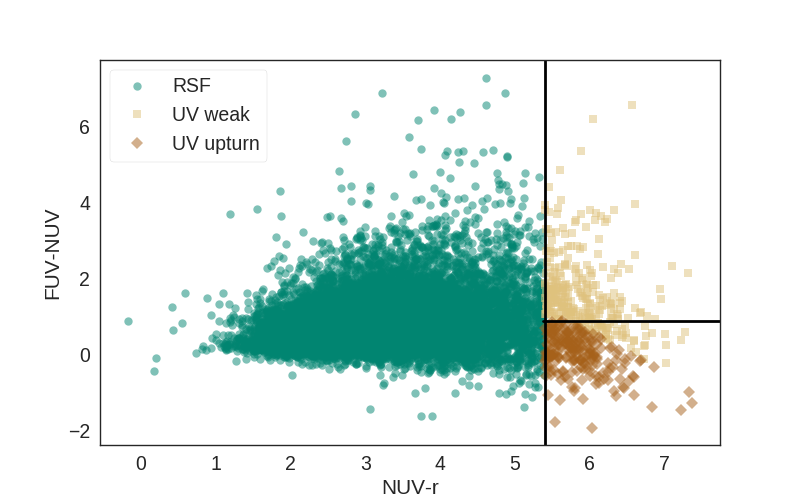

In [18]:
sns.set_style("whitegrid")
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 1.
plt.subplots(1,1, figsize=(8,5))
plot01, = plt.plot((nuv_band - r_band)[idx_rsf], (fuv_band - nuv_band)[idx_rsf], 'o', markersize=6, 
                   color = '#018571', alpha=0.5, label="RSF")
plot02, = plt.plot((nuv_band - r_band)[idx_uvwk], (fuv_band - nuv_band)[idx_uvwk], 's', 
                   markersize=6, color = '#dfc27d', alpha=0.5, label="UV weak")
plot03, = plt.plot((nuv_band - r_band)[idx_uvup], (fuv_band - nuv_band)[idx_uvup], 'D', markersize=6, 
                   color = '#a6611a', alpha=0.5, label="UV upturn")
plt.legend(numpoints=1, loc='best', fontsize=14, frameon=True, framealpha=0.85)
plt.axvline(x=5.4, color='black', linewidth=2.)
plt.axhline(y=0.9, xmin=0.715, xmax=2, color='black', linewidth=2.)
plt.xlabel("NUV-r", fontsize=15)
plt.ylabel("FUV-NUV", fontsize=15)
plt.tick_params('both', labelsize='14')
plt.grid(alpha=0.00)
plt.show()

## UV upturn

In [19]:
bins = np.arange(0, redshift.max(), 0.05)
ratio_uvup_redseq = []
average_redshift = []
z_uv = []
z_rs = []
redshift_uvup = redshift[idx_uvup]

for i in range(bins.size):
    if i==0:
        continue
    else:
        index_redseq_i = np.where((bins[i-1] <= redshift[idx_redseq]) * (redshift[idx_redseq] <= bins[i]))
        index_uvup_i   = np.where((bins[i-1] <= redshift_uvup) * (redshift_uvup <= bins[i]))       
        redshift_bin_redseq = redshift[index_redseq_i]
        redshift_bin_uvup   = redshift_uvup[index_uvup_i]
        if (redshift_bin_redseq.size==0):
            ratio_uvup_i = 0
            print "There are no UV Upturn galaxies in this range of redshift: %.2f and %.2f" % (bins[i-1], bins[i])
        else:
            ratio_uvup_i = (np.float(redshift_bin_uvup.size) / np.float(redshift_bin_redseq.size)) *100
            average_redshift_i = np.average((bins[i], bins[i-1]))
            average_redshift.append(average_redshift_i)
        z_uv.append(redshift_bin_uvup.size)
        z_rs.append(redshift_bin_redseq.size)
        ratio_uvup_redseq.append(ratio_uvup_i)
ratio_uvup_redseq = np.array(ratio_uvup_redseq)
z_uv = np.array(z_uv)
z_rs = np.array(z_rs)
average_redshift  = np.array(average_redshift)

There are no UV Upturn galaxies in this range of redshift: 0.00 and 0.05
There are no UV Upturn galaxies in this range of redshift: 0.35 and 0.40
There are no UV Upturn galaxies in this range of redshift: 0.45 and 0.50
There are no UV Upturn galaxies in this range of redshift: 0.50 and 0.55


In [20]:
adopted_cosmology = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

<IPython.core.display.Javascript object>


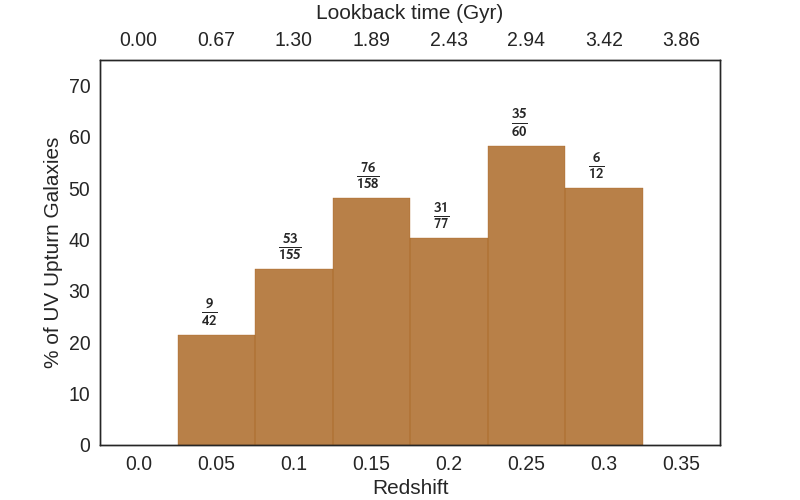

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 11
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 11


In [21]:
n_groups = bins.size
index = np.arange(1,n_groups,1)
sns.set_style('white')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 1.
plt.rcParams['mathtext.fontset'] = u'stixsans'
# plt.rcParams['xtick.bottom'] = True
fig, ax1 = plt.subplots(figsize=(8,5))

# main bar plot:
plt.bar(index[[ratio_uvup_redseq!=0]], ratio_uvup_redseq[[ratio_uvup_redseq!=0]], width=1., alpha=0.8, 
        color='#a6611a', edgecolor='#a6611a')

# fractions in the plot:
for i in range(bins[[ratio_uvup_redseq!=0]].size):
    plt.text(index[i+1]-0.2, ratio_uvup_redseq[i+1]+3.5, r"$\mathrm{\mathbf{\frac{%4d}{%4d}}}$" % (z_uv[i+1], z_rs[i+1]), 
             fontsize=15)
# overall main settings    
plt.xticks(index, bins) # <--------------
plt.ylabel("% of UV Upturn Galaxies", fontsize=15)
plt.xlabel("Redshift", fontsize=15)
plt.tick_params('both', labelsize='14', which='major', direction='in')
plt.xlim(0.5, bins[[ratio_uvup_redseq!=0]].size+2.5) # <--------------
plt.ylim(0, 75)
# plt.tick_params(axis='x',which='minor', bottom='on')

# upper x axis --  lookback time
def lbtime_tick_function(z):
    lbtime = adopted_cosmology.lookback_time(z).value
    return ["%.2f" % i for i in lbtime]

ax2 = ax1.twiny()
ax2.set_xticks(ax1.get_xticks()) 
ax2.set_xlabel(r"Lookback time (Gyr)", fontsize=15, labelpad=9.)
ax2.tick_params('both', labelsize='14')
ax2.set_xticklabels(lbtime_tick_function(bins))
ax2.set_xlim(ax1.get_xlim())
# ax2.tick_params(axis='x',which='minor', )
# plt.grid(alpha=0.1, color='black' ,linestyle='-.')
plt.savefig('../Figs/g2_barplot_uvred.pdf')
plt.savefig('../Figs/g2_barplot_uvred.png')
plt.show()

## UV weak

In [ ]:
bins = np.arange(0, redshift.max(), 0.05)
ratio_uvwk_redseq = []
average_redshift = []
z_uv = []
z_rs = []
redshift_uvwk = redshift[idx_uvwk]

for i in range(bins.size):
    if i==0:
        continue
    else:
        index_redseq_i = np.where((bins[i-1] <= redshift[idx_redseq]) * (redshift[idx_redseq] <= bins[i]))
        index_uvwk_i = np.where((bins[i-1] <= redshift_uvwk) * (redshift_uvwk <= bins[i]))
        redshift_bin_redseq = redshift[index_redseq_i]
        redshift_bin_uvwk   = redshift_uvwk[index_uvwk_i]
        if (redshift_bin_redseq.size==0):
            ratio_uvwk_i = 0
            print "There are no UV weak galaxies in this range of redshift: %.2f and %.2f" % (bins[i-1], bins[i])
        else:
            ratio_uvwk_i = (np.float(redshift_bin_uvwk.size) / np.float(redshift_bin_redseq.size)) *100
            average_redshift_i = np.average((bins[i], bins[i-1]))
            average_redshift.append(average_redshift_i)
        z_uv.append(redshift_bin_uvwk.size)
        z_rs.append(redshift_bin_redseq.size)
        ratio_uvwk_redseq.append(ratio_uvwk_i)
ratio_uvwk_redseq = np.array(ratio_uvwk_redseq)
z_uv = np.array(z_uv)
z_rs = np.array(z_rs)
average_redshift  = np.array(average_redshift)

In [ ]:
n_groups = bins.size
index = np.arange(1,n_groups,1)
sns.set_style('white')
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 1.
plt.rcParams['mathtext.fontset'] = u'stixsans'
plt.subplots(1,1, figsize=(8,5))
plt.bar(index[[ratio_uvwk_redseq!=0]], ratio_uvwk_redseq[[ratio_uvwk_redseq!=0]], width=1., alpha=0.8, 
        color='#a6611a', edgecolor='#a6611a')
for i in range(bins[[ratio_uvwk_redseq!=0]].size-1):
    plt.text(index[i+1]-0.2, ratio_uvwk_redseq[i+1]+3.5, r"$\bf{\mathrm{\frac{%4d}{%4d}}}$" % (z_uv[i+1], z_rs[i+1]), 
             fontsize=15)
plt.xticks(index, bins)
plt.ylabel("% of UV weak Galaxies", fontsize=15)
plt.xlabel("Redshift", fontsize=15)
plt.tick_params('both', labelsize='14')
plt.xlim(0.5, bins[[ratio_uvwk_redseq!=0]].size + 1)
plt.ylim(0, 115)
plt.show()

## Absolute Magnitude r band x NUV-r

In [ ]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 1.
    
    plt.subplots(figsize=(8,10))
    ax1=plt.subplot(2,1,1)    
    plt.plot(mag_abs_r, nuv_band-r_band, 'o', color='gray', alpha=0.3, label='All galaxies')
    plt.plot(mag_abs_r[idx_uvup], (nuv_band-r_band)[idx_uvup], 'o', color='#a6611a', alpha=0.7, label='UV Upturn')
    plt.ylabel("NUV-r", fontsize=15)
    plt.tick_params('both', labelsize='14')
    l1 = plt.legend(loc='lower left', numpoints=1, fontsize=14, frameon=True, framealpha=0.85)
    l1.get_frame().set_edgecolor('black')
    plt.grid(alpha=0.3)
 
    ax2=plt.subplot(2,1,2) 
    plt.plot(mag_abs_r, g_band - r_band, 'o', color='gray', alpha=0.3, label='All galaxies')
    plt.plot(mag_abs_r[idx_uvup], (g_band - r_band)[idx_uvup], 'o', color='#a6611a', alpha=0.7, label='UV Upturn')
    plt.xlabel("M$_r$", fontsize=15)
    plt.ylabel("g-r", fontsize=15)
    plt.tick_params('both', labelsize='14')
    l2 = plt.legend(loc='lower left', numpoints=1, fontsize=14, frameon=True, framealpha=0.85)
    l2.get_frame().set_edgecolor('black')
    plt.grid(alpha=0.3)
    
    plt.savefig('../Figs/g2_color_mag.pdf')
    plt.savefig('../Figs/g2_color_mag.png')
    plt.tight_layout()
    plt.show()

In [ ]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 1.
      
    fig = plt.figure(figsize=(8,6))
    gs  = GridSpec(4,4, height_ratios=[2.,1.5,3.,3.], width_ratios=[3.,1.5,3.,1.5])

    ax_joint  = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])
    
    # Scatter plot -- MAIN PLOT ------------------------------------------------------------------------------------
    ax_joint.scatter(mag_abs_r, nuv_band-r_band, c='gray', alpha=0.3, label='All galaxies')
    ax_joint.scatter(mag_abs_r[idx_uvwk], (nuv_band-r_band)[idx_uvwk], c='#dfc27d', alpha=0.5, label='UV Weak')
    ax_joint.scatter(mag_abs_r[idx_uvup], (nuv_band-r_band)[idx_uvup], c='#a6611a', alpha=0.5, label='UV Upturn')
    ax_joint.xaxis.set_major_locator(mt.ticker.MultipleLocator(1))
    ax_joint.yaxis.set_major_locator(mt.ticker.MultipleLocator(1))
    ax_joint.tick_params('both', labelsize='14')
    l1 = ax_joint.legend(loc='lower left', numpoints=1, fontsize=14, frameon=True, framealpha=0.85)
    l1.get_frame().set_edgecolor('black')
    
    # Mr distribution -- on the top --------------------------------------------------------------------------------
    n, bins, patches = ax_marg_x.hist(mag_abs_r, color='gray', alpha=0.3, bins=30, edgecolor='black', normed=True)
    n, bins, patches = ax_marg_x.hist(mag_abs_r[idx_uvwk], color='#dfc27d', alpha=0.5, bins=bins, edgecolor='black', 
                                      normed=True)
    n, bins, patches = ax_marg_x.hist(mag_abs_r[idx_uvup], color='#a6611a', alpha=0.5, bins=bins, edgecolor='black', 
                                      normed=True)
    ax_marg_x.tick_params('both', labelsize='14')
    ax_marg_x.yaxis.set_major_locator(mt.ticker.MultipleLocator(0.5))
   
    
    # NUV-r distribution --on the right ----------------------------------------------------------------------------
    n, bins, patches = ax_marg_y.hist(nuv_band-r_band, orientation="horizontal", color='gray', alpha=0.3, bins=20, 
                                      edgecolor='black', normed=True)
    n, bins, patches = ax_marg_y.hist((nuv_band-r_band)[idx_uvwk], orientation="horizontal", color='#dfc27d', 
                                      alpha=0.5, bins=bins, edgecolor='black', normed=True)
    n, bins, patches = ax_marg_y.hist((nuv_band-r_band)[idx_uvup], orientation="horizontal", color='#a6611a', 
                                      alpha=0.5, bins=bins, edgecolor='black', normed=True)
    ax_marg_y.yaxis.set_major_locator(mt.ticker.MultipleLocator(0.5))
    ax_marg_y.tick_params(axis='x', labelsize='14')
    
   # Turn off tick labels on marginals
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    # Set labels on joint
    ax_joint.set_xlabel("M$_r$", fontsize=15)
    ax_joint.set_ylabel("NUV-r", fontsize=15)

    # Set labels on marginals
    ax_marg_y.set_xlabel('NUV-r \n frequency', fontsize=15)
    ax_marg_x.set_ylabel('M$_r$ \n frequency', fontsize=15)
    
    plt.savefig('../Figs/g2_cmag_uv_dist.pdf')
    plt.savefig('../Figs/g2_cmag_uv_dist.png')
    plt.tight_layout()
    plt.show()

In [ ]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 1.
      
    fig = plt.figure(figsize=(8,6))
    gs  = GridSpec(4,4, height_ratios=[2.,1.5,3.,3.], width_ratios=[3.,1.5,3.,1.5])

    ax_joint  = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])
    
    # Scatter plot -- MAIN PLOT ------------------------------------------------------------------------------------
    ax_joint.scatter(mag_abs_r, nuv_band-r_band, c='gray', alpha=0.3, label='All galaxies')
    ax_joint.scatter(mag_abs_r[idx_uvup], (nuv_band-r_band)[idx_uvup], c='#a6611a', alpha=0.7, label='UV Upturn')
    ax_joint.xaxis.set_major_locator(mt.ticker.MultipleLocator(1))
    ax_joint.yaxis.set_major_locator(mt.ticker.MultipleLocator(1))
    ax_joint.tick_params('both', labelsize='14')
    l1 = ax_joint.legend(loc='lower left', numpoints=1, fontsize=14, frameon=True, framealpha=0.85)
    l1.get_frame().set_edgecolor('black')
    
    # Mr distribution -- on the top --------------------------------------------------------------------------------
    n, bins, patches = ax_marg_x.hist(mag_abs_r, color='gray', alpha=0.3, bins=30, edgecolor='black')
    n, bins, patches = ax_marg_x.hist(mag_abs_r[idx_uvup], color='#a6611a', alpha=0.7, bins=bins, edgecolor='black')
    ax_marg_x.tick_params('both', labelsize='14')
    ax_marg_x.yaxis.set_major_locator(mt.ticker.MultipleLocator(0.5))  
    ax_marg_x.set_yscale('log')
    
    # NUV-r distribution --on the right ----------------------------------------------------------------------------
    n, bins, patches = ax_marg_y.hist(nuv_band-r_band, orientation="horizontal", color='gray', alpha=0.3, bins=20, 
                                      edgecolor='black')
    n, bins, patches = ax_marg_y.hist((nuv_band-r_band)[idx_uvup], orientation="horizontal", color='#a6611a', 
                                      alpha=0.7, bins=bins, edgecolor='black')
    ax_marg_y.yaxis.set_major_locator(mt.ticker.MultipleLocator(0.5))
    ax_marg_y.tick_params(axis='x', labelsize='14')
    ax_marg_y.set_xscale('log')
    
   # Turn off tick labels on marginals
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    # Set labels on joint
    ax_joint.set_xlabel("M$_r$", fontsize=15)
    ax_joint.set_ylabel("NUV-r", fontsize=15)

    # Set labels on marginals
    ax_marg_y.set_xlabel('NUV-r \n frequency', fontsize=15)
    ax_marg_x.set_ylabel('M$_r$ \n frequency', fontsize=15)
    
#     plt.savefig('../Figs/g2_cmag_uv_dist.pdf')
    plt.savefig('../Figs/g2_cmag_uv_dist_log.png')
    plt.tight_layout()
    plt.show()

In [ ]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"] = 1.
      
    fig = plt.figure(figsize=(8,6))
    gs  = GridSpec(4,4, height_ratios=[2.,1.5,3.,3.], width_ratios=[3.,1.5,3.,1.5])

    ax_joint  = fig.add_subplot(gs[1:4,0:3])
    ax_marg_x = fig.add_subplot(gs[0,0:3])
    ax_marg_y = fig.add_subplot(gs[1:4,3])
    
    # Scatter plot -- MAIN PLOT ------------------------------------------------------------------------------------
    ax_joint.scatter(mag_abs_r, g_band-r_band, c='gray', alpha=0.3, label='All galaxies')
    ax_joint.scatter(mag_abs_r[idx_uvwk], (g_band-r_band)[idx_uvwk], c='#dfc27d', alpha=0.5, label='UV Weak')
    ax_joint.scatter(mag_abs_r[idx_uvup], (g_band-r_band)[idx_uvup], c='#a6611a', alpha=0.5, label='UV Upturn')
    ax_joint.xaxis.set_major_locator(mt.ticker.MultipleLocator(1))
    ax_joint.yaxis.set_major_locator(mt.ticker.MultipleLocator(1))
    ax_joint.tick_params('both', labelsize='14')
    l1 = ax_joint.legend(loc='lower left', numpoints=1, fontsize=14, frameon=True, framealpha=0.85)
    l1.get_frame().set_edgecolor('black')
    
    # Mr distribution -- on the top --------------------------------------------------------------------------------
    n, bins, patches = ax_marg_x.hist(mag_abs_r, color='gray', alpha=0.3, bins=30, edgecolor='black', normed=True)
    n, bins, patches = ax_marg_x.hist(mag_abs_r[idx_uvwk], color='#dfc27d', alpha=0.5, bins=bins, edgecolor='black', 
                                      normed=True)
    n, bins, patches = ax_marg_x.hist(mag_abs_r[idx_uvup], color='#a6611a', alpha=0.5, bins=bins, edgecolor='black', 
                                      normed=True)
    ax_marg_x.tick_params('both', labelsize='14')
  
    
    # g-r distribution --on the right ----------------------------------------------------------------------------
    n, bins, patches = ax_marg_y.hist(g_band-r_band, orientation="horizontal", color='gray', alpha=0.3, bins=20, 
                                      edgecolor='black', normed=True)
    n, bins, patches = ax_marg_y.hist((g_band-r_band)[idx_uvwk], orientation="horizontal", color='#dfc27d', 
                                      alpha=0.5, bins=bins, edgecolor='black', normed=True)
    n, bins, patches = ax_marg_y.hist((g_band-r_band)[idx_uvup], orientation="horizontal", color='#a6611a', 
                                      alpha=0.5, bins=bins, edgecolor='black', normed=True)
    ax_marg_y.tick_params(axis='x', labelsize='14')
    
   # Turn off tick labels on marginals
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)

    # Set labels on joint
    ax_joint.set_xlabel("M$_r$", fontsize=15)
    ax_joint.set_ylabel("g-r", fontsize=15)

    # Set labels on marginals
    ax_marg_y.set_xlabel('g-r \n frequency', fontsize=15)
    ax_marg_x.set_ylabel('M$_r$ \n frequency', fontsize=15)
    
    plt.savefig('../Figs/g2_cmag_opt_dist.pdf')
    plt.savefig('../Figs/g2_cmag_opt_dist.png')
    plt.tight_layout()
    plt.show()

## Magnitudes Distribution

In [ ]:
bxplt = {}
bxplt['UV_CLASS']  = uv_class[idx_redseq]
bxplt['MAG_ABS_R'] = mag_abs_r[idx_redseq]
bxplt['Z'] = redshift[idx_redseq]
bxplt = pd.DataFrame(bxplt)

In [ ]:
bins = np.arange(0, (redshift).max(), 0.05)

print bins
bins_average = []
for i in range(bins.size-1):
    bins_average.append(np.average([bins[i+1], bins[i]]))
bins_average = np.array(bins_average)

print bins_average

In [ ]:
z_cut = pd.cut(bxplt['Z'], bins = np.array(bins), labels=list(bins[0:-1]))
palette = ['#dfc27d', '#a6611a']
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 1.
fig, ax1 = plt.subplots(figsize=(8,5))
plot01 = sns.boxplot(x=z_cut, y='MAG_ABS_R', hue='UV_CLASS', notch=True, palette=palette, data=bxplt, fliersize=4)
plt.setp(plot01.artists, alpha=1.)
handles, _ = plot01.get_legend_handles_labels()
plt.legend(handles, ["UV Weak", "UV Upturn"], fontsize=15)
plt.xlim(0,bins[[ratio_uvup_redseq!=0]].size+1)
plt.ylabel("M$_r$", fontsize=15)
plt.xlabel("Redshift", fontsize=15)
plt.tick_params('both', labelsize='14')
plt.gca().invert_yaxis()

ax2 = ax1.twiny()
ax2.set_xticks(ax1.get_xticks()) 
ax2.set_xlabel(r"Lookback time (Gyr)", fontsize=15, labelpad=9.)
ax2.tick_params('both', labelsize='14')
ax2.set_xticklabels(lbtime_tick_function(bins))
ax2.set_xlim(ax1.get_xlim())

plt.savefig('../Figs/g2_bxplts_mag.png')
plt.savefig('../Figs/g2_bxplts_mag.pdf')
plt.show()